### Apartado -01

#### 1.3 Ejemplos prácticos

 Paso 1: Instalación y carga de librerías

In [ ]:
!pip install vaderSentiment
!pip install textblob
!pip install deep-translator

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from deep_translator import GoogleTranslator

Análisis con VADER (inglés y español)

In [ ]:
analyzer = SentimentIntensityAnalyzer()
texto_es = "La nueva bebida energética #NuevaEnergia2025 está increíble 😍"
resultado_vader_es = analyzer.polarity_scores(texto_es)
print("Resultado VADER (español sin traducir):", resultado_vader_es)

Resultado VADER (español sin traducir): {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}


In [ ]:
texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto_es)
resultado_vader_en = analyzer.polarity_scores(texto_traducido)

print("Texto traducido:", texto_traducido)
print("Resultado VADER (texto traducido):", resultado_vader_en)

Texto traducido: The new energy drink #NuevaEnergia2025 is incredible 😍
Resultado VADER (texto traducido): {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.659}


In [ ]:
analyzer = SentimentIntensityAnalyzer()
text = "The product is fantastic, I really love it!"
result = analyzer.polarity_scores(text)
print("Resultado VADER (escrito directamente en inglés):", result)

Resultado VADER (escrito directamente en inglés): {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.855}


Análisis con TextBlob

In [ ]:
texto_ing = "The product is fantastic, I really love it!"
blob = TextBlob(texto_ing)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

Polarity: 0.5125
Subjectivity: 0.75


In [ ]:
texto_es2 = "El servicio fue lento pero la comida excelente"
texto_traducido2 = GoogleTranslator(source='auto', target='en').translate(texto_es2)

blob_es = TextBlob(texto_traducido2)
print("Texto traducido:", texto_traducido2)
print("Polarity:", blob_es.sentiment.polarity)
print("Subjectivity:", blob_es.sentiment.subjectivity)

Texto traducido: The service was slow but the food excellent
Polarity: 0.35
Subjectivity: 0.7


### Apartado -02

#### 2.2.	Uso de modelos fine-tuned con Hugging Face pipeline()

Análisis de sentimientos en inglés

In [ ]:
from transformers import pipeline

# Cargamos un pipeline de análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis")

# Texto en inglés
text = "The product works perfectly and the customer service was excellent!"

# Análisis
result = sentiment_pipeline(text)

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998617172241211}]


Análisis de sentimientos en español

In [ ]:
from transformers import pipeline

# Cargar modelo multilingüe
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Texto en español
text = "El servicio fue rápido y el producto llegó en excelente estado."

# Análisis
result = sentiment_pipeline(text)

print(result)

Device set to use cuda:0


[{'label': '5 stars', 'score': 0.6862971186637878}]


Cómo cambiar de modelo fácilmente

In [ ]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

Device set to use cuda:0


In [ ]:
text = "Estoy feliz con el producto"
print(sentiment_pipeline(text))

[{'label': 'LABEL_1', 'score': 0.6695683598518372}]


#### 2.3.	Implementación sobre textos reales y simulados

Modelo 1: nlptown/bert-base-multilingual-uncased-sentiment

In [ ]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimiento
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Ejemplo real en español
texto = "El servicio fue excelente, rápido y muy amable."

resultado = sentiment_pipeline(texto)
print(resultado)

Device set to use cuda:0


[{'label': '5 stars', 'score': 0.7718003988265991}]


In [ ]:
# Ejemplo real en español
texto = "La pelicula estuvo pésima, no la recomiendo"

resultado = sentiment_pipeline(texto)
print(resultado)

[{'label': '1 star', 'score': 0.8212642073631287}]


Modelo 2: pysentimiento/robertuito-sentiment-analysis

In [ ]:
from transformers import pipeline

# Usamos el modelo especializado en español informal
sentiment_pipeline = pipeline("sentiment-analysis", model="pysentimiento/robertuito-sentiment-analysis")

# Ejemplo real de Twitter
texto = "No me gustó para nada el nuevo disco. Muy decepcionante."

resultado = sentiment_pipeline(texto)
print(resultado)

In [ ]:
texto2 = "¡Qué buena película! Me hizo reír y llorar. Muy recomendada."
resultado2 = sentiment_pipeline(texto2)
print(resultado2)

[{'label': 'POS', 'score': 0.9718033075332642}]


Modelo 3: finiteautomata/beto-sentiment-analysis

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="finiteautomata/beto-sentiment-analysis")

texto = "El producto no esta ni bien, ni mal, esta regular"

resultado = sentiment_pipeline(texto)
print(resultado)

Device set to use cpu


[{'label': 'NEU', 'score': 0.4203813076019287}]


In [ ]:
texto2 = "¡Qué buena cena! Me hizo pensar en mi infancia. Muy recomendada."
resultado2 = sentiment_pipeline(texto2)
print(resultado2)

[{'label': 'POS', 'score': 0.9985380172729492}]


Ejemplo de 10 comentarios y gráfica de sentimientos

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt

# Crear el pipeline con modelo multilingüe en español
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Comentarios en español (simulados)
comentarios = [
    "¡Qué gran experiencia! Todo estuvo perfecto.", # Positivo
    "No me gustó para nada, pésimo servicio.", # Negativo
    "La comida estaba bien, pero el lugar era muy ruidoso.", # Neutro
    "Excelente atención al cliente, volveré sin dudas.", # Positivo
    "Meh, esperaba más por el precio que pagué.", # Negativo
    "Horrible, no lo recomiendo a nadie.", # Negativo
    "Una sorpresa muy agradable, superó mis expectativas.", # Positivo
    "No estuvo mal, pero tampoco fue la gran cosa.", # Neutro
    "Estoy muy decepcionado, perdí mi tiempo.", # Negativo
    "Muy buena calidad, entrega rápida y todo correcto." # Positivo
]

# Aplicar análisis de sentimiento
resultados = sentiment_pipeline(comentarios)

# Función para convertir estrellas en etiquetas
def convertir_estrellas_a_sentimiento(label):
    estrellas = int(label.split()[0])
    if estrellas >= 4:
        return "Positivo"
    elif estrellas == 3:
        return "Neutral"
    else:
        return "Negativo"

# Contar sentimientos
conteo = {"Positivo": 0, "Neutral": 0, "Negativo": 0}
for r in resultados:
    categoria = convertir_estrellas_a_sentimiento(r["label"])
    conteo[categoria] += 1

Device set to use cuda:0


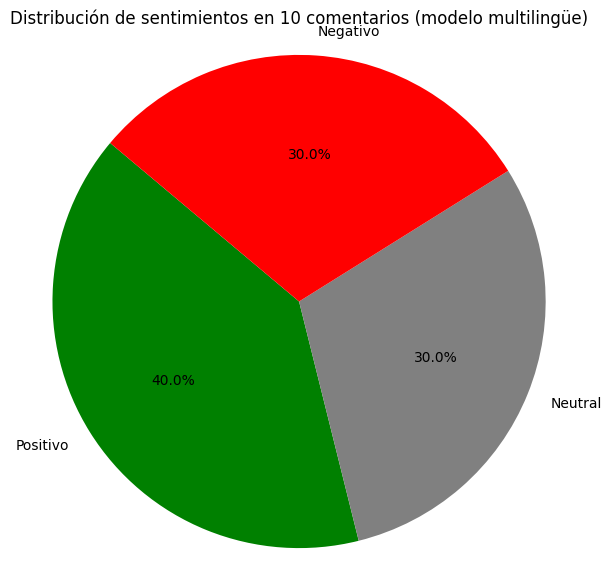

In [ ]:
# Gráfico de pastel
labels = list(conteo.keys())
sizes = list(conteo.values())
colors = ['green', 'gray', 'red']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de sentimientos en 10 comentarios (modelo multilingüe)")
plt.axis('equal')
plt.show()

Análisis con 5 comentarios y gráfica de estrellas

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt

# Crear el pipeline con modelo multilingüe
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 5 comentarios variados en español
comentarios = [
    "La app es bastante útil, aunque a veces se cierra sola.",
    "Excelente producto, superó todas mis expectativas.",
    "No funciona como esperaba, estoy muy decepcionado.",
    "Es aceptable, pero hay opciones mejores por el mismo precio.",
    "Me encantó, fácil de usar y muy completa."
]

# Ejecutar análisis de sentimiento
resultados = sentiment_pipeline(comentarios)

# Extraer número de estrellas de las etiquetas
estrellas = [int(r["label"].split()[0]) for r in resultados]

Device set to use cpu


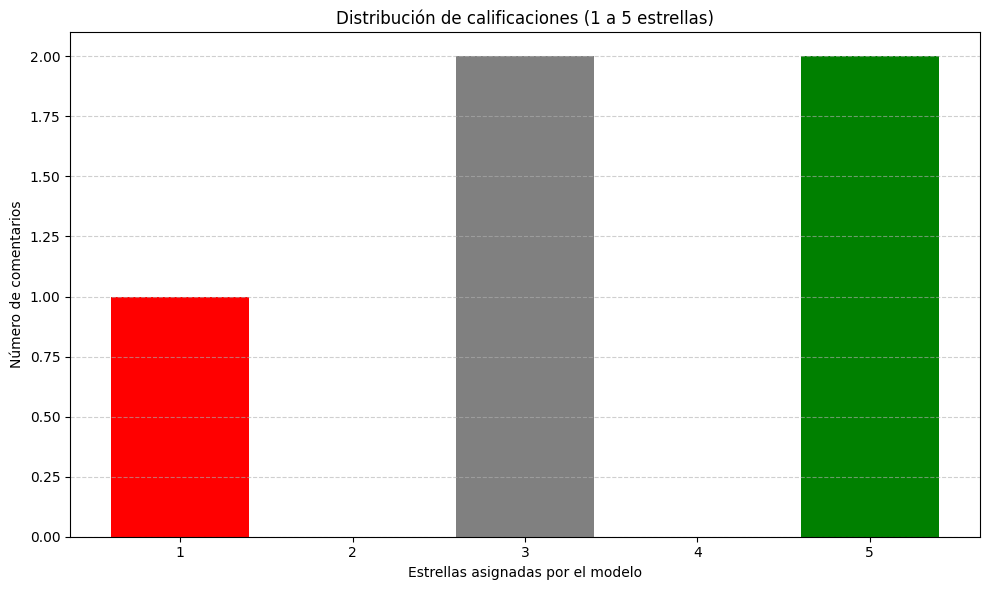

In [ ]:
# Crear gráfico de barras con las calificaciones
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), [estrellas.count(i) for i in range(1, 6)],
        color=["red", "orange", "gray", "lightgreen", "green"])

plt.xticks(range(1, 6))
plt.xlabel("Estrellas asignadas por el modelo")
plt.ylabel("Número de comentarios")
plt.title("Distribución de calificaciones (1 a 5 estrellas)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Apartado -03

#### 3.3.1.	Clasificación de sentimiento vía prompts con Mistral

Paso 1: Instalación de dependencias

In [ ]:
# Instalamos las librerías necesarias
!pip install transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Paso 2: Autenticación

In [ ]:
from google.colab import userdata
tu_token_de_huggingface = userdata.get('tu_token_de_huggingface')

In [ ]:
from huggingface_hub import login

# Coloca tu token aquí (puedes usar input() si lo prefieres)
login(tu_token_de_huggingface)

Paso 3: Cargar el modelo generativo

In [ ]:
from transformers import pipeline

# Cargamos el modelo de Mistral desde Hugging Face
generator = pipeline(
    "text-generation",
    model="mistralai/Mistral-7B-Instruct-v0.1",
    device_map="auto",
    max_new_tokens=100
)

 Ejemplo 1: Clasificación directa de sentimiento

In [ ]:
# Texto de entrada
texto_1 = "La nueva versión del producto es lenta y difícil de usar."

# Prompt simple de clasificación
prompt_1 = f"Clasifica el sentimiento del siguiente texto como Positivo, Negativo o Neutral:\n\"{texto_1}\""

# Generación de respuesta
respuesta_1 = generator(prompt_1)
print("Ejemplo 1:")
print(respuesta_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Ejemplo 1:
Clasifica el sentimiento del siguiente texto como Positivo, Negativo o Neutral:
"La nueva versión del producto es lenta y difícil de usar."
Negativo


Ejemplo 2: Clasificación con escala de emociones

In [ ]:
# Texto más emocional
texto_2 = "Después de esperar tanto, el producto ni siquiera funcionó."

# Prompt con escala emocional (más matizado)
prompt_2 = f"Evalúa el tono emocional del siguiente comentario en una escala de 1 (muy negativo) a 5 (muy positivo):\n\"{texto_2}\""

respuesta_2 = generator(prompt_2)
print("\nEjemplo 2:")
print(respuesta_2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



Ejemplo 2:
Evalúa el tono emocional del siguiente comentario en una escala de 1 (muy negativo) a 5 (muy positivo):
"Después de esperar tanto, el producto ni siquiera funcionó."
3


Ejemplo 3: Clasificación + recomendación de acción

In [ ]:
texto_3 = "El empaque llegó roto pero el producto funciona perfectamente."

# Prompt más complejo con doble tarea
prompt_3 = f"Clasifica el sentimiento del siguiente mensaje como Positivo, Negativo o Mixto, y sugiere una acción para el equipo de soporte:\n\"{texto_3}\""

respuesta_3 = generator(prompt_3)
print("\nEjemplo 3:")
print(respuesta_3[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



Ejemplo 3:
Clasifica el sentimiento del siguiente mensaje como Positivo, Negativo o Mixto, y sugiere una acción para el equipo de soporte:
"El empaque llegó roto pero el producto funciona perfectamente."
Positivo. Suggested action for the support team: Respond to the customer's concern about the damaged packaging and offer a replacement or a discount on the next purchase.


In [ ]:
texto_3 = "El empaque llegó roto pero el producto funciona perfectamente."

# Prompt más complejo con doble tarea
prompt_3 = f"Clasifica el sentimiento del siguiente mensaje como Positivo, Negativo o Mixto, responde en el idioma español y sugiere una acción para el equipo de soporte:\n\"{texto_3}\""

respuesta_3 = generator(prompt_3)
print("\nEjemplo 3:")
print(respuesta_3[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



Ejemplo 3:
Clasifica el sentimiento del siguiente mensaje como Positivo, Negativo o Mixto, responde en el idioma español y sugiere una acción para el equipo de soporte:
"El empaque llegó roto pero el producto funciona perfectamente."
Positivo
Sugierta al equipo de soporte: Comprueba si el empaque contiene todos los componentes y si la presentación del producto está correcta. Si todo está en orden, no es necesario realizar ninguna acción adicional.


#### 3.3.2.	Generación de respuestas empáticas con LLaMA 2

Paso 3: Cargar el modelo generativo

In [ ]:
from transformers import pipeline

# Configuramos el modelo LLaMA
llama_generator = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    device_map="auto",
    max_new_tokens=70
)

Ejemplo 1: Queja por retraso en entrega

In [ ]:
input_text = [
    {"role": "system",
    "content": "Eres un analista de sentimientos: Generar una respuesta empática y corta para nuestro cliente"
    },
    {
      "role": "user",
      "content": "Comentario Cliente: Hice el pedido hace una semana y todavía no llega. Es muy frustrante y necesito una solución ya."
    }
  ]

response = llama_generator(input_text)
response[0]['generated_text'][-1]

{'role': 'assistant',
 'content': 'Sí, es importante que te cuentes que el pedido que haces durante un tiempo no tiene servicio o que el servicio no funciona. La solución es que contactes con el proveedor de productos o servicios, a menudo se puede pedir que regrese el producto o servicio con un cambio'}

Ejemplo 2: Producto defectuoso

In [ ]:
input_text_2 = [
    {"role": "system",
    "content": "Eres un analista de sentimientos: Generar una respuesta empática y corta para nuestro cliente en menos de 100 palabras"
    },
    {
      "role": "user",
      "content": "Comentario Cliente: Recibí el producto, pero vino dañado y no puedo usarlo. Estoy muy decepcionado."
    }
  ]

response = llama_generator(input_text_2)
response[0]['generated_text'][-1]

{'role': 'assistant',
 'content': 'Si hay algún problema con el producto recibido, es importante que informes lo antes posible, ya que no será posible solicitar su reembolso ni hacer necesidades de reparación. Si el problema se encuentra en el producto, es posible que pueda hacer un proceso de reembolso, en'}

Ejemplo 3: Sugerencia de mejora

In [ ]:
input_text_3 = [
    {"role": "system",
    "content": "Eres un analista de sentimientos: Retornar si el comentario es positivo, negativo o neutral"
    },
    {
      "role": "user",
      "content": "Comentario Cliente: El servicio de atención es bueno, pero sería genial si pudieran ofrecer soporte en fines de semana."
    }
  ]

response = llama_generator(input_text_3)
response[0]['generated_text'][-1]

{'role': 'assistant',
 'content': 'Comentario Respuesta: Estás de acuerdo, su comentario es muy relevante y me parece que la oferta de soporte en fines de semana sería muy útil para muchos clientes. Se ha agregado una opción de soporte en fines de semana a la página de prefer'}

#### 3.3.3.	Generación de respuestas empáticas con Falcon

Paso 3: Cargar el modelo generativo

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-gld_bubj
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-gld_bubj
  Resolved https://github.com/huggingface/transformers.git to commit d5d007a1a0f0c11a726a54c8f00bd71825f84d02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("tiiuae/Falcon-H1-1.5B-Deep-Instruct")
falcon_generator = AutoModelForCausalLM.from_pretrained("tiiuae/Falcon-H1-1.5B-Deep-Instruct")

In [ ]:
comentario = "Hice el pedido hace una semana y todavía no llega. Es muy frustrante y necesito una solución ya."

prompt = f"""Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil.
  Cliente: {comentario}
  Respuesta:
  """

Ejemplo 1: Entrega retrasada

In [ ]:
# Tokenizar la entrada (prompt)
inputs = tokenizer(prompt, return_tensors="pt")

# Generar la respuesta del modelo
outputs = falcon_generator.generate(input_ids=inputs['input_ids'], max_length=150, num_return_sequences=1)

# Decodificar la salida generada
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Imprimir la respuesta generada
print(generated_text)

Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil. 
  Cliente: Hice el pedido hace una semana y todavía no llega. Es muy frustrante y necesito una solución ya.
  Respuesta:
  ¡Entendemos tu frustración! Te instamos a revisar tu estado de pedido en tu cuenta para verificar su estado actual. Si aún no lo encuentras, por favor contacta con nosotros al correo [correo electrónico] o al teléfono [número de teléfono] para


Ejemplo 2: Producto defectuoso

In [ ]:
comentario = "El producto que recibí llegó con una pieza rota. Esto me parece inaceptable."

prompt = f"""Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil.
  Cliente: {comentario}
  Respuesta:
  """

In [ ]:
# Tokenizar la entrada (prompt)
inputs = tokenizer(prompt, return_tensors="pt")

# Generar la respuesta del modelo
outputs = falcon_generator.generate(input_ids=inputs['input_ids'], max_length=150, num_return_sequences=1)

# Decodificar la salida generada
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Imprimir la respuesta generada
print(generated_text)

Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil. 
  Cliente: El producto que recibí llegó con una pieza rota. Esto me parece inaceptable.
  Respuesta:
  ¡Entendemos tu frustración! Te agradecemos por comunicar este problema de inmediato. Te ofrecemos una solución inmediata: reemplazo de la pieza rota o reembolso completo. Por favor, envíanos detalles de tu pedido para procesar tu reclamación. ¿Preferirías el reem


Ejemplo 3: Buena atención

In [ ]:
comentario = "Me atendieron muy bien y resolvieron mi problema rápidamente. Gracias por su ayuda."

prompt = f"""Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil.
  Cliente: {comentario}
  Respuesta:
  """

In [ ]:
# Tokenizar la entrada (prompt)
inputs = tokenizer(prompt, return_tensors="pt")

# Generar la respuesta del modelo
outputs = falcon_generator.generate(input_ids=inputs['input_ids'], max_length=150, num_return_sequences=1)

# Decodificar la salida generada
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Imprimir la respuesta generada
print(generated_text)

Actúa como un agente de atención al cliente. Tu tarea es responder de forma empática, breve y útil. 
  Cliente: Me atendieron muy bien y resolvieron mi problema rápidamente. Gracias por su ayuda.
  Respuesta:
  ¡Estamos encantados de saber que te sentiste satisfecho con nuestro servicio! ¡Gracias por tu apoyo! ¿Hay algo más en lo que podamos ayudarte hoy?


### Ejercicio de aprendizaje

Paso 1: Instalar e importar librerías necesarias

In [ ]:
!pip install transformers accelerate -q

from transformers import pipeline

# Cargar modelo TinyLLaMA desde Hugging Face
llama_generator = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    max_new_tokens=100,
    do_sample=True,
    temperature=0.7
)

Paso 2: Definir el prompt del sistema y el comentario del cliente

In [ ]:
# Prompt de rol de sistema + entrada de usuario
input_text = [
    {"role": "system",
     "content": "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"},
    {"role": "user",
     "content": "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}
]

# Generar la respuesta
response = "XXXXXXXXXXXXX"
print(XXXXXXXXXXXX)